<img src="./src/logo.png" width="250">

**Baustein:** Künstliche Neuronale Netze  **Subbaustein:** Grundlagen  $\rightarrow$ **Übungsserie**

**Version:** 1.0, **Lizenz:** <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">CC BY-NC-ND 4.0</a>

***


Notwendige `import`-Anweisungen für dieses Notebook

In [1]:
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, get_scorer, get_scorer_names
from sklearn.preprocessing import StandardScaler

# Teil 1: Ein Einführungsbeispiel

----

### Aufgabe 1: Daten laden

Laden Sie die Datei `data/ANNBsp1.csv` in einen Pandas Data Frame namens `daten` und stellen Sie die Werte dar.

In [2]:
# Ihr Code

In [3]:
# Lösung
daten = pd.read_csv('./data/ANNBsp1.csv') # Laden des Datensatzes
daten

,x,y,value
0,0,0,1
1,0,1,0
2,1,0,1
3,1,1,1


Wie wir in der Papierübung gesehen haben, sind die Daten linear separierbar, und wir haben ein Perzeptron gesehen, das sie klassifiziert.

Neuronale Netze in `scikit-learn` werden im `MLPClassifier` (Multilayer-Perzeptron) implementiert. Diese Klasse eignet sich nicht zum Implementation großer Projekte, für einfache Beispiele wir hier in der Übung ist sie ausreichende performanant.

Ein `MLPClassifier` hat mindestens einen Hidden Layer mit einem Neuron / Perzeptron.
 
<small>**Hinweis**: In `scikit-learn` wird kein Perzeptron mit einer Aktivierungsfunktion zur Verfügung gestellt, wie wir es in der Vorlesung kennengelernt haben. (Das "Perzeptrion", das zur Verfügung gestellt wird, ist ein spezieller Aufruf der Erzeugung einer "Support Verctor Machine".</small> 

Generelles Vorgehen, um den `MLPClassifier` zu lernen:

1. Trennung von Features/Merkmalen und Klasse:
    1. Sie erzeugen einen Pandas Data Frame mit den $x$- und $y$-Werten, den Features, als `X`.
    2. Sie erzeugen eine Pandas Series `y` mit `value` als Klassenvariable / Target.
2. Sie erzeugen ein Objekt der Klasse `MLPClassifier` mit den Modell-relevanten Parametern.
3. Sie trainieren den Klassifier mit den Trainigsdaten.

Im vorliegenden Beispiel kennen wir die Gesamtheit der Daten (insgesamt vier Datenpunkte) und trainieren das Modell für alle Daten.

In [4]:
# Schritt 1.1 und 1.2
X=daten.copy()
y=X.pop('value')

# Schritt 2 
model=MLPClassifier(random_state=10)

#Schritt 3
model.fit(X,y)

/opt/tljh/user/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=10)

Das Training ist nicht erfolgreich, da das Modell nicht konvergiert ist.

Um dies zu verändern, müssen Standardparameter (Hyperparameter) anpassen. Diese betreffen u.a. die Architektur, die Aktivierungsfunktion und das Training.


----

### Aufgabe 2: Standardwerte für Hyperparameter

Gehen Sie auf die Seiten der [Dokumentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
und suchen Sie die Standardwerte für die folgenden Parameter:

1. Wie viele hidden Layer gibt es?
2. Wie groß ist die Anzahl der Neuronen in diesen Layern?
3. Was ist die Aktivierungsfunktion?
4. Nach wievielen Epochen (Iterations) wird das Training abgebrochen?

**Ihre Antworten:**

Achitektur:

- Anzahl Hidden Layer:

- Anzahl Neuronen pro Hidden Layer:

Aktivierungsfunktion:

Training: 

- Maximale Anzahl Epochen / Iterations:


**Ihre Antworten: - Solution**

Architektur:

- Anzahl Hidden Layer: 1

- Anzahl Neuronen pro Hidden Layer: 100

Aktivierungsfunktion: relu

Training: 

- Maximale Anzahl Epochen / Iterations: 200



----
Wir erhöhen nun die Anzahl der Epochen, indem Sie den Wert `max_iter` setzen, auf einen Wert, bei dem das Training erfolgreich ist.

In [5]:
# Schritt 2 # setzen Sie hier einen hoch genugen Wert ein
model=MLPClassifier(random_state=10, max_iter=800)
model.fit(X,y)

MLPClassifier(max_iter=800, random_state=10)

mit `n_iter_` können wir die Anzahl der benötigten Epochen anzeigen:

In [6]:
model.n_iter_

468

Nun können wir das trainierte Modell anwenden, um die Daten vorherzusagen, und die Genauigkeit zu bestimmen. 

In [7]:
ypred=model.predict(X)
print("Die Vorhersagen:",ypred)
print('Accuracy:',model.score(X,y))


Die Vorhersagen: [1 0 1 1]
Accuracy: 1.0


----

### Aufgabe 3: Architektur anpassen

Das erlernte Netz ist für dieses einfache Problem natürlich viel zu groß. Verändern Sie die Architektur, also die Anzahl Neuronen in der Inneren Schicht (`hidden_layer_sizes`) und bestimmen Sie die Genauigkeit des trainierten Netzes. Versuchen Sie, ein möglichst kleines Netz abzubilden, ohne dass die Genauigkeit leidet. 

In [8]:
# Ihr Code

In [9]:
# Solution

# das ist das kleinste Netz (ein innerer Knoten) aber viele Epochen 
model=MLPClassifier(hidden_layer_sizes=(1,), random_state=10, max_iter=2000)
model.fit(X,y)

print(model.n_iter_)
ypred=model.predict(X)
print('Accuracy:',model.score(X,y))

1731
Accuracy: 1.0


Die Werte der Gewichte und der Intercepts können Sie mit folgendem Code ansehen:

In [10]:
print("Weights:",model.coefs_)
print("Intercept:",model.intercepts_)


Weights: [array([[ 1.86716874],
       [-1.27324917]]), array([[2.26872477]])]
Intercept: [array([1.27333842]), array([-0.80977997])]


----

### Aufgabe 4: Netzwerk skizzieren

Machen Sie eine Skizze des Netzes und schreiben die Werte (natürlich gerundet) in die Skizze.


**Hinweis:** Beim Trainieren von Neuronalen Netze erhalten Gewichte und Bias einen initialen Wert. Durch den Parameter `random_state` kann dieser initiale Wert beeinflusst werden. 

----
### Aufgabe 5: Netzwerk für XOR lernen

Laden Sie die `XOR`-Daten aus `data/ANNBsp2.csv` und lösen Sie dieses Problem mit einem Netzwerk mit drei Neuronen im Hidden Layer. Hierfür müssen Sie verschiedene Werte von `random_state` testen.
  


In [11]:
# Ihr Code

In [12]:
# Lösung

# ein Wert von 32 geht z.B.

daten = pd.read_csv('./data/ANNBsp2.csv') # Laden des Datensatzes
# Aufteilen in Features und Target
X=daten.copy()
y=X.pop('value')
# Model definieren inkl. Parameter
model=MLPClassifier(hidden_layer_sizes=(3,), random_state=10, max_iter=4000)
# Trainieren
model.fit(X,y)
#Vorhersagen und Evaluieren
ypred=model.predict(X)
print('Accuracy:',model.score(X,y))

Accuracy: 0.75


---- 
### Aufgabe 6: Fragen zu Teil 1

Beantworten Sie die folgenden Fragen zu Teil 1.

In [1]:
%run src/07_KNN_PJY_001_Fragen_01.ipynb

# Teil 2: Das Cancer Datenset

In diesem Teil arbeiten wir mit dem [Wisconsin Breast Cancer Datensatz](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). 

31 numerische Merkmale wurden aus Bildern extrahiert. Das Merkmal `diagnosis` ist die Klasse: `M` (malign) ist ein bösartiger Tumor, `B` (benign) ein gutartiger.

----
### Aufgabe 7: Daten laden und kennenlernen

- Laden Sie die Daten aus `data/cancer.csv`.
- Sehen Sie sich die Information über die Spalten mit `info()` sowie die Zusammenfassung der numerischen Werte mit `describe()` an.
- Geben Sie Anzahl Datenpunkte für die beiden verschiedenen Werte der Diagnose aus (`value_counts()`) und beantworten Sie untenstehende Frage nach der Ausgeglichenheit. 

In [14]:
# Ihr Code

In [15]:
#Loesung 

daten = pd.read_csv('./data/cancer.csv') # Laden des Datensatzes

print(daten.info())
print(daten.describe())
daten['diagnosis'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

diagnosis
B    357
M    212
Name: count, dtype: int64

In [2]:
%run src/07_KNN_PJY_001_Fragen_02.ipynb

## Klassifikation **ohne** Trennung von Test und Trainingsdaten zur Überprüfung der Machbarkeit

Um prinzipiell zu sehen, ob sich ein Neuronales Netz eignen könnte, verwenden wir in einem ersten Schritt ein Neuronales Netz ohne spezifische Parameter zu setzen, um die Daten zu klassifizieren.



----
### Aufgabe 8: ANN für Cancer Daten 

Gehen Sie wie oben vor, um ein Neuronales Netz zu trainieren. Vergessen Sie nicht, das Merkmal `id` aus den Daten zu entfernen. 

In [ ]:
# Ihr Code


In [17]:
# Lösung

daten = pd.read_csv('./data/cancer.csv') # Laden des Datensatzes
# Aufteilen in Features und Target
X=daten.copy()
X.pop('id')
y=X.pop('diagnosis')
# Model definieren inkl. Parameter
model=MLPClassifier( random_state=10, max_iter=4000)
# Trainieren
model.fit(X,y)
#Vorhersagen und Evaluieren
ypred=model.predict(X)
print('Accuracy:',model.score(X,y))


Accuracy: 0.9507908611599297


----
### Aufgabe 9: Confusion Matrix

Stellen Sie die Confusion Matrix dar.
```python
cm=confusion_matrix(y_test,y_predict)
print(cm)
```

Mit dem folgenden Code Segment, können Sie diese graphisch darstellen:

```python
cmd = ConfusionMatrixDisplay(cm, display_labels=['B','M'])
cmd.plot()
```


In [18]:
# Ihr Code

[[342  15]
 [ 13 199]]


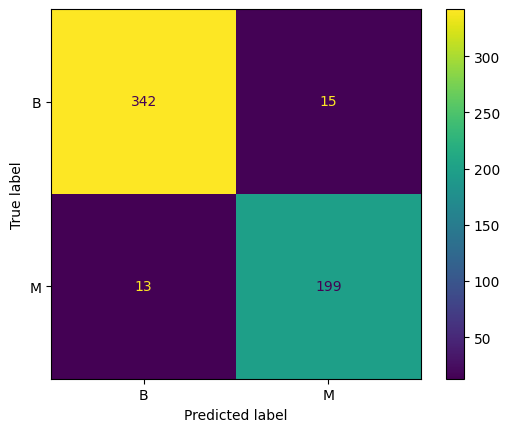

In [19]:
# Loesung
cm=confusion_matrix(y,ypred)
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=['B','M'])
cmd.plot()

## Klassifikation: Trennung von Trainings und Test-Daten

Um die Güte eines Models abschätzen zu können, müssen wir das Model mit Daten testen, die nicht für das Training genutzt werden. Wir teilen die Daten also in Trainings- und Testdaten auf. Hierzu nutzen wir

```python
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=..., random_state=...)
```

Durch Setzen des Parameters `random_state` stellen wir sicher, dass der Split für Tests mit anderen Modellen wiederholt werden kann.

----
### Aufgabe 10: ANN für Cancer Daten und Bestimmung des Gütemaßes mit Testdaten

1. Teilen Sie die Daten in ein Trainings- und eine Testdatenmenge auf. Verwenden Sie 70 % der Daten für die Trainingsdaten.
2. Trainieren Sie das Netz mit den Trainingsdaten.
3. Testen Sie das Netz mit den Testdaten und geben Sie die Accuracy und die Confusion Matrix aus.

Hinweis: Denken Sie daran, das Merkmal `id` zu entfernen.

In [20]:
# Ihr Code

Accuracy: 0.9473684210526315
[[108   0]
 [  9  54]]


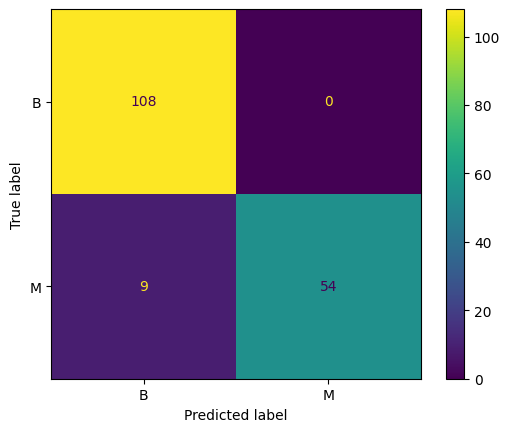

In [21]:
# Lösung
daten = pd.read_csv('./data/cancer.csv') # Laden des Datensatzes
# Aufteilen in Features und Target
X=daten.copy()
X.pop('id')
y=X.pop('diagnosis')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)
# Model definieren inkl. Parameter
model=MLPClassifier(random_state=10, max_iter=4000)
# Trainieren
model.fit(X_train,y_train)
#Vorhersagen und Evaluieren
ypred=model.predict(X_test)
print('Accuracy:',model.score(X_test,y_test))
cm=confusion_matrix(y_test,ypred)
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=['B','M'])
cmd.plot()

Das Ergebnis dieses Trainings ist realistischer als oben, da wir nun mit unabhängigen Daten testen. Wir versuchen, ob wir es noch etwas verbessern können.

In **Aufgabe 7** haben Sie sich die Werte angesehen. Die Wertebereiche der einzelnen Features sind sehr unterschiedlich. Es macht daher Sinn, hier eine Skalierung / Normalisierung zu verwenden. 

----
### Aufgabe 11: Skalierung der Daten

Skalieren Sie die Daten mit dem `StandardScaler`. Die Verwendung haben Sie in der Übungsserie zur Klassifikation kennengelernt.

1. Teilen Sie die Daten in eine Trainings- und Testdatenmenge auf. Die Trainingsdaten sollen 70% der Daten umfassen.
2. Erzeugen Sie einen `StandardScaler`.
3. Trainieren Sie den Scaler mit den Trainingsdaten und skalieren Sie die Trainingsdaten.  
4. Trainieren Sie das Netz mit den (skalierten) Trainingsdaten.
5. Verwenden Sie den traininerten Scaler, um die Testdaten zu skalieren.
6. Testen Sie das Netz mit den Testdaten und geben Sie die Accuracy und die Confusion Matrix aus. 


In [22]:
# Ihr Code

Accuracy: 0.9766081871345029
[[106   2]
 [  2  61]]


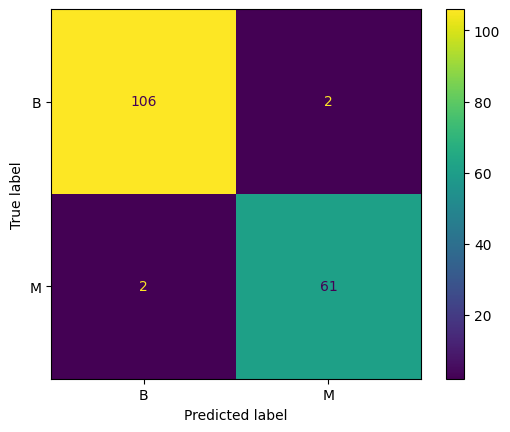

In [23]:
# Lösung
daten = pd.read_csv('./data/cancer.csv') # Laden des Datensatzes
# Aufteilen in Features und Target
X=daten.copy()
X.pop('id')
y=X.pop('diagnosis')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)#,stratify=y)
# Skalieren
scaler=StandardScaler()
X_trainScaled=scaler.fit_transform(X_train)
# Model definieren inkl. Parameter
model=MLPClassifier(random_state=10, max_iter=4000)
# Trainieren
model.fit(X_trainScaled,y_train)
#Vorhersagen und Evaluieren
X_testScaled=scaler.transform(X_test)
ypred=model.predict(X_testScaled)
print('Accuracy:',model.score(X_testScaled,y_test))
cm=confusion_matrix(y_test,ypred)
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=['B','M'])
cmd.plot()

Die Güte des Models ist deutlich besser geworden.

Wir wir oben gesehen haben, ist der Datensatz nicht ausgeglichen. Es ist daher möglich, dass die Verteilung der unterschiedlichen Klassen im Trainings- und Testdatensatz nicht der Verteilung der Klassen im gesamten Datensatz entspricht. Um sicherzustellen, dass die Verteilung der Klassen in den Datensätzen möglichst der Verteilung der Klassen im Gesamtdatensatz entspricht, können wir den Parameter `stratify` setzen:

```python
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=..., random_state=...,stratify=y)
```

----
### Aufgabe 12: Verteilung der Klassen in Trainings- und Testdaten gemäß der Gesamtverteilung

Testen Sie, ob sich die Werte verändern, wenn Sie den Parameter `stratify` verwenden.

**Hinweis:** Es ist möglich, dass sich die Werte sogar verschlechtern. 
- Neuronale Netze werden mit zufällig initialisierten Anfangswerten trainiert. Diese haben einen Einfluss auf das Ergebnis.
- Kleine Unterschiede in Accuracy sind nicht aussagekräftig. 


Wie wir gesehen haben, ist das Datenset nicht ausgeglichen.

----
### Aufgabe 13: Gütemaße

Welche anderen Gütemaße haben Sie in der Vorlesung kennengelernt?

**Antwort:**



----
# Teil 3: Der Palmer Pinguin Datensatz

----
### Aufgabe 14: Klassifikation der Pinguine

Laden Sie den Palmer Pinguin Datensatz und klassifizieren Sie Pinguine basierend auf der Schnabellänge, der Schnabelhöhe, der Flossenlänge und dem Gewicht mit einem neuronalen Netz. 

Mit 
```python
daten=daten[['Pinguinart','Schnabellaenge','Schnabelhoehe','Flossenlaenge','Gewicht']].copy()
```
erzeugen Sie einen Datensatz, der nur die notwendigen Merkmale und die Klassen enthält.

Testen Sie verschiedene Netzarchitekturen und Aktivierungsfunktionen.

In [25]:
# Ihr Code

Accuracy: 0.9693877551020408
[[41  3  0]
 [ 0 20  0]
 [ 0  0 34]]


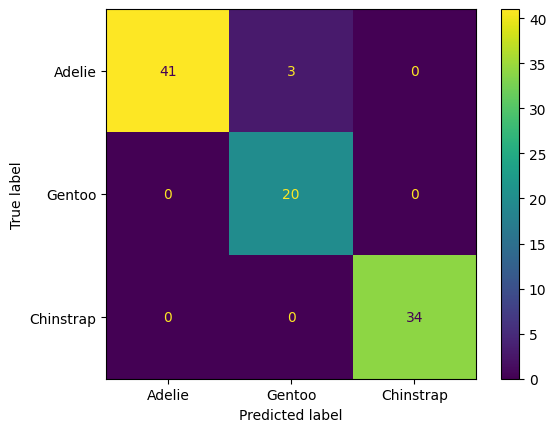

In [26]:
# Code für die Pinguine
daten = pd.read_csv('./data/penguins.csv') # Laden des Datensatzes
# Aufteilen in Features und Target
daten=daten[['Pinguinart','Schnabellaenge','Schnabelhoehe','Flossenlaenge','Gewicht']].copy()
X=daten.copy()
y=X.pop('Pinguinart')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)#,stratify=y)
# Skalieren
scaler=StandardScaler()
X_trainScaled=scaler.fit_transform(X_train)
# Model definieren inkl. Parameter
model=MLPClassifier(hidden_layer_sizes=(4,),random_state=10, max_iter=4000)
# Trainieren
model.fit(X_trainScaled,y_train)
#Vorhersagen und Evaluieren
X_testScaled=scaler.transform(X_test)
ypred=model.predict(X_testScaled)
print('Accuracy:',model.score(X_testScaled,y_test))
cm=confusion_matrix(y_test,ypred)
print(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Adelie','Gentoo','Chinstrap'])
cmd.plot()

---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Die Übungsserie begleitend zum AI4ALL-Kurs</span> der <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">EAH Jena</span> ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Namensnennung - Nicht kommerziell - Keine Bearbeitungen 4.0 International Lizenz</a>.

Der AI4ALL-Kurs entsteht im Rahmen des Projekts MoVeKI2EAH. Das Projekt MoVeKI2EAH wird durch das BMBF (Bundesministerium für Bildung und Forschung) und den Freistaat Thüringen im Rahmen der Bund-Länder-Initiative zur Förderung von Künstlicher Intelligenz in der Hochschulbildung gefördert (12/2021 bis 11/2025, Föderkennzeichen 16DHBKI081).